# Women Shoes Online Retail Analysis                

### Team 2 - Yunlei Zhou, Vivian Yu, Erick Bao, Yue Ping, Dekun Zhang, Xiaoyang Xu

We are investigating a dataset consists of aorund 10,000 rows containing online retail product information of women-shoes from 2018. This dataset includes information on product id, date, brand, types, colors, manufacturers, multiple price entry including maximum price, minimum price, discount, etc. We intend to use product data to demonstrate the pricing trend and discount activity of women shoes with the price distribution, discount trend, and the overall correlation between price and other shoes’ characteristics. 

Here is a brief look at our raw dataset:

In [1]:
%%bq query
select *
FROM `ba770-team2.women_shoes.wsdata`
limit 5

brand,name,type,size,prices_max,prices_min,discount,discount_ratio,prices_isSale,dateUpdated,date,color,color_num
Daniel Green,Daniel Green Adel,Slippers,6,35.0,35.0,0.0,0.0,False,2018-01-20,2018-01-20 00:00:00,Blue,10
IB Non-Slip,Womens IB Tornado Boots,Boots,6,39.99,39.99,0.0,0.0,False,2018-01-03,2018-01-03 00:00:00,Navy,3
ryka,Ryka Tisza Women's Shoes,Sneakers,8,60.0,60.0,0.0,0.0,False,2018-02-01,2018-02-01 00:00:00,Navy,3
ryka,Ryka Tisza Women's Shoes,Sneakers,8,60.0,60.0,0.0,0.0,False,2018-02-01,2018-02-01 00:00:00,Taupe,2
ryka,Ryka Tisza Women's Shoes,Sneakers,6,60.0,60.0,0.0,0.0,False,2018-02-01,2018-02-01 00:00:00,Gray,1


## 1. Women Shoes Product Overview

### 1.1. The categories of women shoes that have the TOP 5 largest amount of products are
 > Boots, Heels, Sandals, Sneakers, Flats

In [9]:
%%bq query
SELECT type, COUNT(*) AS amount
FROM `ba770-team2.women_shoes.wsdata`
GROUP BY type
ORDER BY amount DESC

type,amount
Boots,2500
Heels,1935
Sandals,1721
Sneakers,1578
Flats,1164
Mules,476
Loafers,321
Running Shoes,201
others,59
Dress Shoes,14


### 1.2. Over 90% of the shoes are in the top 5 categories

In [8]:
%%bq query --n type_amount
SELECT type, COUNT(*) AS amount
FROM `ba770-team2.women_shoes.wsdata`
GROUP BY type
ORDER BY amount DESC

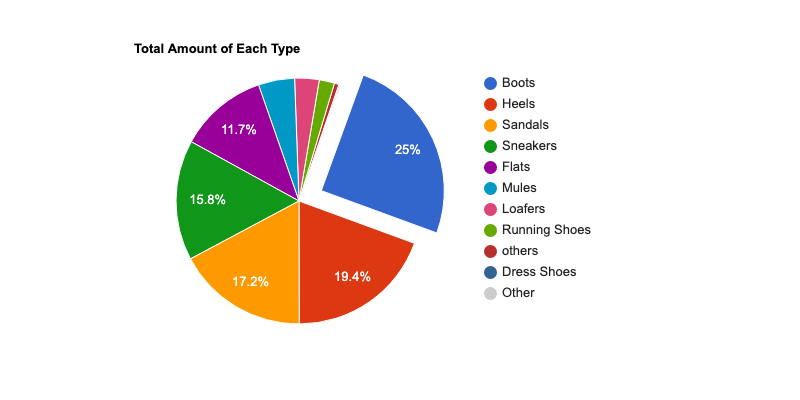

In [11]:
%%chart pie --d type_amount
title: Total Amount of Each Type
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
offset: .2

In [18]:
%%bq query --n color_ratio
SELECT color, COUNT(*) AS amount
FROM `ba770-team2.women_shoes.wsdata`
GROUP BY color
ORDER BY amount DESC

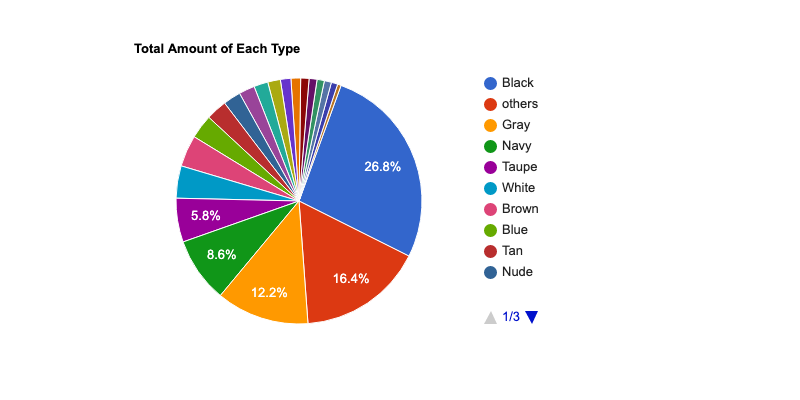

In [19]:
%%chart pie --d color_ratio
title: Total Amount of Each Type
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
offset: .2

### 1.3. Price Distribution of Each Type

In [15]:
%%bq query
SELECT
  type,
  max(prices_max) AS max_price,
  min(prices_min) AS min_price,
  ROUND((max(prices_max) + min(prices_min))/2,2) AS price_mid_range
FROM
  `ba770-team2.women_shoes.wsdata`
GROUP BY
  type
ORDER BY
  price_mid_range DESC

type,max_price,min_price,price_mid_range
Boots,359.95,12.74,186.34
Running Shoes,179.95,58.48,119.21
Sneakers,129.99,26.24,78.12
Heels,130.0,13.49,71.75
Sandals,125.0,7.49,66.25
Loafers,90.0,23.79,56.89
Oxfords,54.99,54.99,54.99
Flats,89.99,8.99,49.49
Mules,79.99,14.99,47.49
others,89.95,4.88,47.41


### 1.4. Top 10 Expensive Brands

In [2]:
%%bq query -n price_max
SELECT
  brand,
  AVG(prices_max) AS avg_max
FROM
  `ba770-team2.women_shoes.wsdata`
GROUP BY
  brand
ORDER BY
  avg_max desc
limit 10

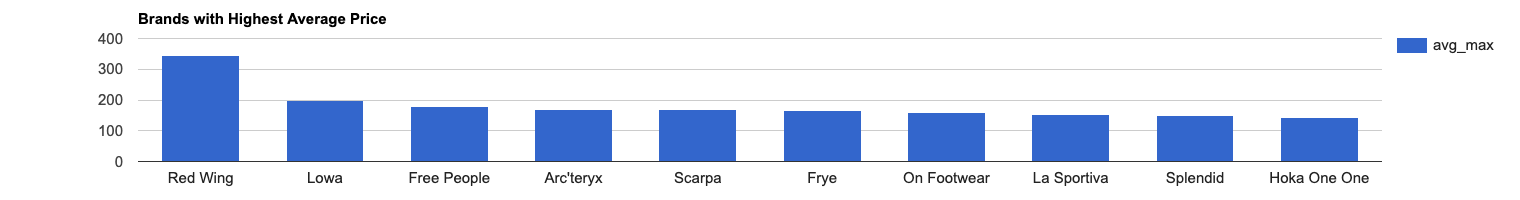

In [3]:
%%chart columns --data price_max
title: Brands with Highest Average Price

### 1.5 Price and Discounts

#### 1.5.1 Price vs Discount (absolute values)
From the chart we see that there is a positive correlation between price and discount amount, which means the shoes with higher price is more possible to have higher discount in dollar. 

In [2]:
%%bq query --n price1
SELECT prices_max,  discount
FROM `ba770-team2.women_shoes.wsdata`

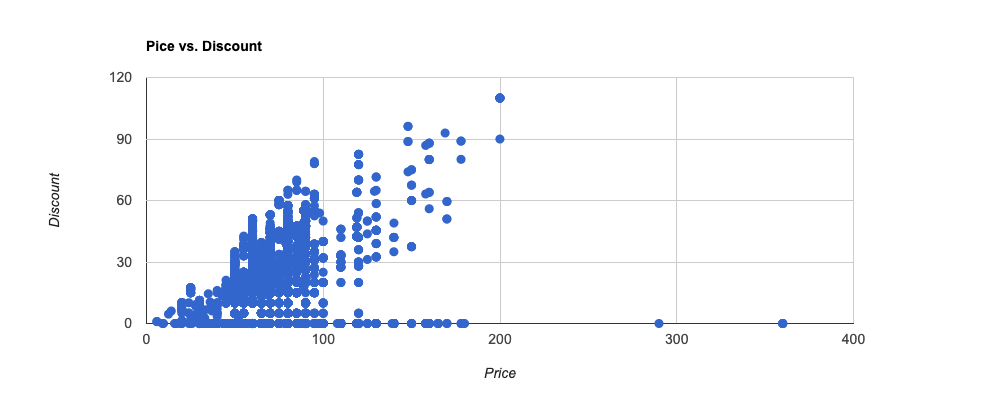

In [5]:
%%chart scatter --d price1
title: Pice vs. Discount
height: 400
width: 1000
hAxis:
  title: Price
vAxis:
  title: Discount
legend: none

#### 1.5.2 Price vs Discount Ratio
However, when we look at the priec and the discount ratio, it shows that the products with higher price does not have a correlated higher discount rate. Even though the discount in dollar is increasing as the price goes up, but the discount rate is increasing in a slower pace  comparing with the price. 

In [20]:
%%bq query --n ratio
SELECT prices_max,  discount_ratio
FROM `ba770-team2.women_shoes.wsdata`

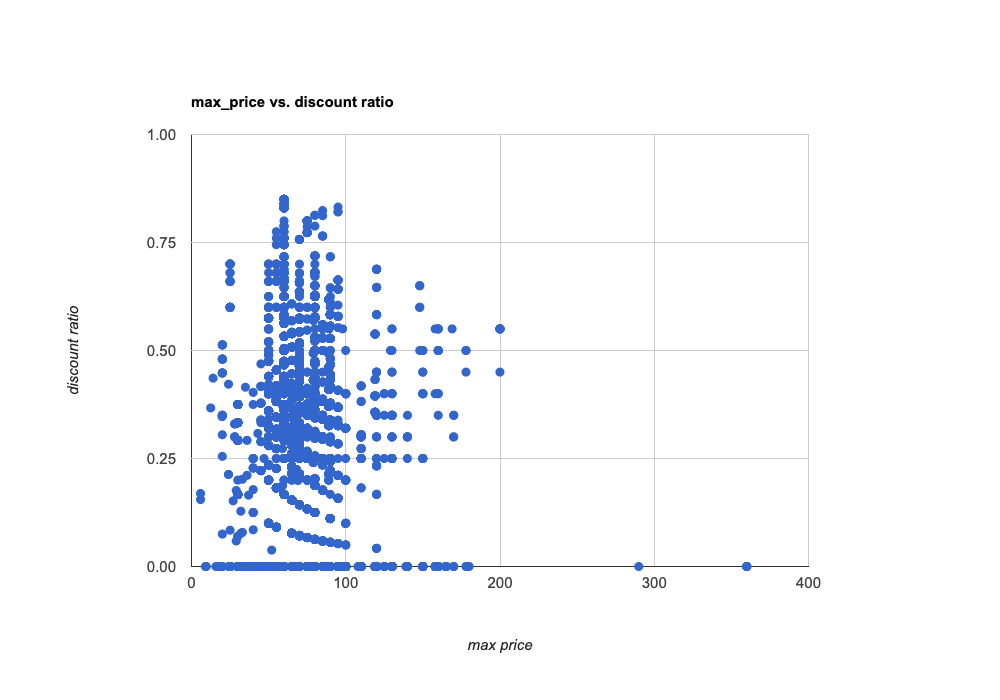

In [21]:
%%chart scatter --d ratio
title: max_price vs. discount ratio
height: 700
width: 1000
hAxis:
  title: max price
vAxis:
  title: discount ratio
legend: none

## 2. A Closer Look Into Discount Frequency and Ratio Varied by Time

__Boots, heels, sandals, sneakers and flats sum most of the women shoes' market. Because of personal interest, we decided that in the following analysis we only select boots, heels, sneakers and flats for our shoes type.__

The column chart below displays the overall discount frequency in the whole dataset, grouped by the top five shoes type.

In [2]:
%%bq query --n pie_s1
select *
from `ba770-team2.Derivatives_from_bquery.exper`
where shoes_type !='Sandals'

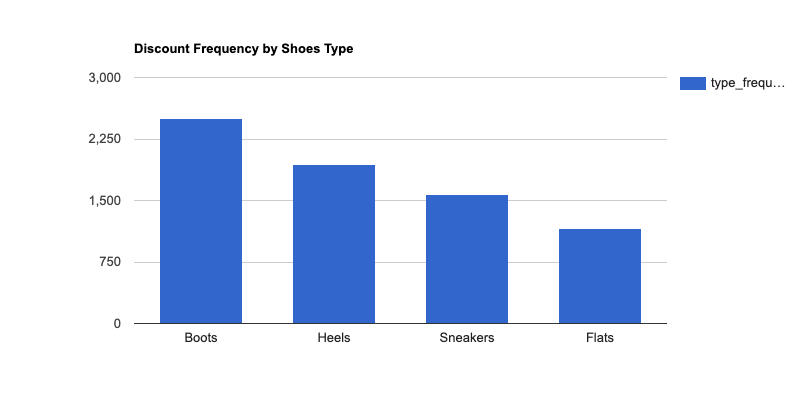

In [3]:
%%chart columns --fields shoes_type,type_frequency  --data pie_s1
title: Discount Frequency by Shoes Type
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2  

* How do we further our analysis? 
* How can we help one making informed purchasing decisions based on our data?  
We need to take a closer look into the timing. When do merchants offer discounted prices for different type of shoes? Is this the best time to make your purchase, or you can wait a little bit to save more bucks?  
__This requires us to look at discount frequency and ratio with time as an independent variable for different type of shoes.__

  
  
## 2.1. Summary of Shoes Discount Frequency Varied by Time.  
* Below is a column chart displaying discount frequency in winter season (January to March). 


In [5]:
%%bq query -n sea1
select boots_frequency as boots,heels_frequency as heels,sneakers_frequency as sneakers, flats_frequency as flats, sandals_frequency as sandals,
CASE WHEN month = 1 then 'Jan' 
  WHEN month = 2 then 'Feb'
  WHEN month = 3 then 'Mar'
  END AS month2
from `ba770-team2.Derivatives_from_bquery.season1_01`
ORDER BY month

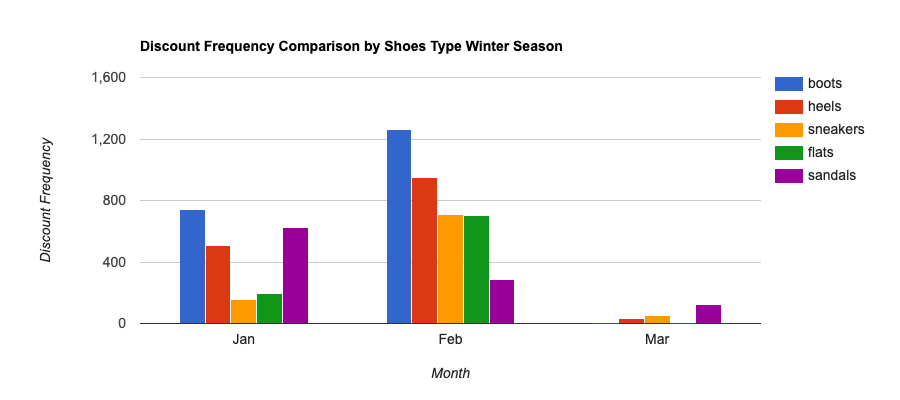

In [6]:
%%chart columns --fields month2,boots,heels,sneakers,flats,sandals --data sea1
title: Discount Frequency Comparison by Shoes Type Winter Season
height: 400
width: 900
hAxis:
  title: Month
vAxis:
  title: Discount Frequency

* Below is a column chart displaying discount frequency in spring season (April to June).  

#### Notice there is *no* discount data for targeted group of shoes in May.

In [7]:
%%bq query -n sea2
SELECT boots_frequency as boots,heels_frequency as heels,sneakers_frequency as sneakers, flats_frequency as flats, sandals_frequency as sandals,
CASE WHEN month = 4 then 'Apr' 
  WHEN month = 6 then 'Jun'
  END AS month2
from `ba770-team2.Derivatives_from_bquery.season2_01`
ORDER BY month

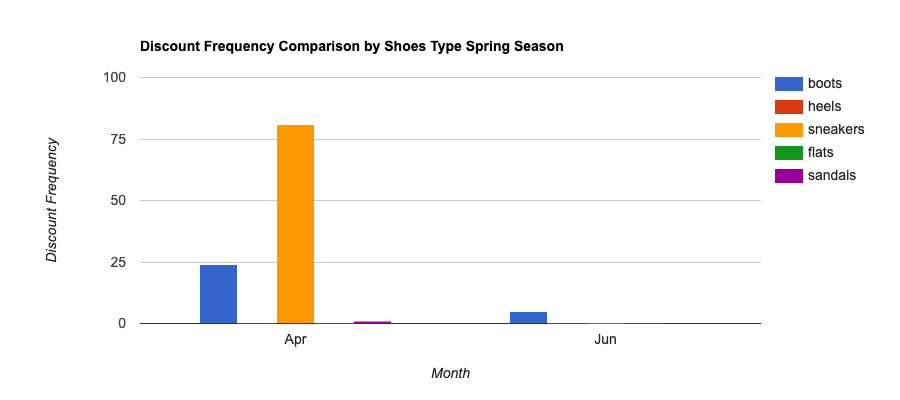

In [8]:
%%chart columns --fields month2,boots,heels,sneakers,flats,sandals --data sea2
title: Discount Frequency Comparison by Shoes Type Spring Season
height: 400
width: 900
hAxis:
  title: Month
vAxis:
  title: Discount Frequency

* Below is a column chart displaying discount frequency in summer season (July only).  


#### Notice we have only observations from July in the dataset. This dataset is inherently unbalanced.
It seems from the data there are very few observations for discount in summer season which contradicts our knowledge about discounts.It could be dut to the methodology used to collect this dataset (which seems to be using python code to extract web data). 

In [9]:
%%bq query -n sea3
select month,boots_frequency as boots,heels_frequency as heels,sneakers_frequency as sneakers, flats_frequency as flats, sandals_frequency as sandals,
CASE WHEN month = 7 then 'Jul' 
  WHEN month = 8 then 'Aug'
  WHEN month = 9 then 'Sep'
  END AS month2
from `ba770-team2.Derivatives_from_bquery.season3_01`
ORDER BY month

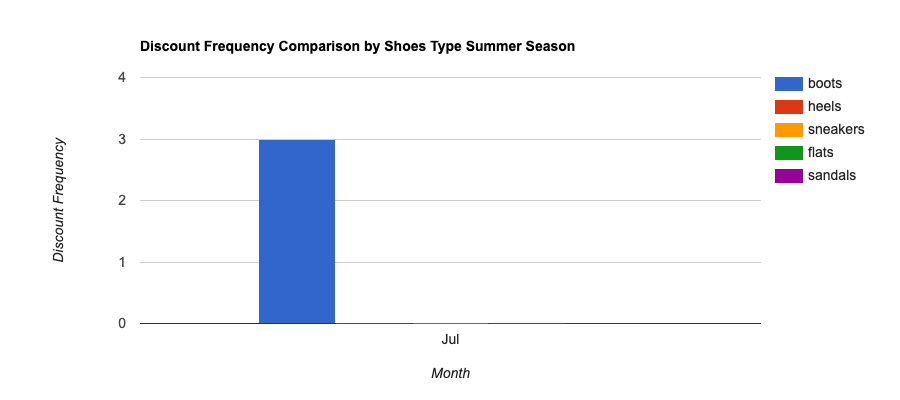

In [10]:
%%chart columns --fields month2,boots,heels,sneakers,flats,sandals --data sea3
title: Discount Frequency Comparison by Shoes Type Summer Season
height: 400
width: 900
hAxis:
  title: Month
vAxis:
  title: Discount Frequency

* For fall season, we have __highly incomplete data__ as we only have one observation from October that has discount which cannot say anything about frequency for discount in fall season.

## 2.2. Rate of discount varied by time.

* Below is a scatter chart displaying discount ratio for different types of shoes in winter season.

In [5]:
%%bq query -n sea1_avg
select  boots,heels, sneakers,flats,sandals,
CASE WHEN month = 1 then 'Jan' 
  WHEN month = 2 then 'Feb'
  WHEN month = 3 then 'Mar'
  END AS month2
from `ba770-team2.Derivatives_from_bquery.s1_average`
order by month

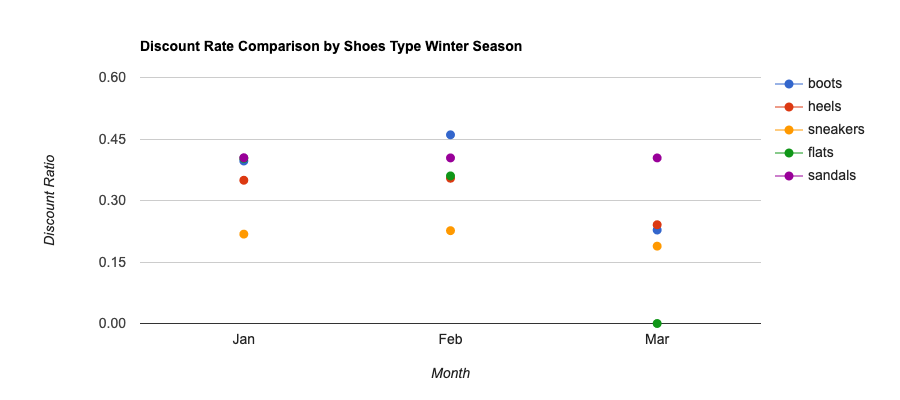

In [6]:
%%chart scatter --fields month2,boots,heels,sneakers,flats,sandals --data sea1_avg
title: Discount Rate Comparison by Shoes Type Winter Season
height: 400
width: 900
hAxis:
  title: Month
vAxis:
  title: Discount Ratio

* Below is a scatter chart displaying discount ratio for different types of shoes in spring season.

In [13]:
%%bq query -n sea2_avg
select max(boots_avg_discount) as boots, max(sneakers_avg_discount) as sneakers, max(sandals_avg_discount) as sandals,
CASE WHEN month = 4 then 'Apr' 
  WHEN month = 6 then 'Jun'
  END AS month2
from `ba770-team2.Derivatives_from_bquery.season2_avg`
group by month
order by month

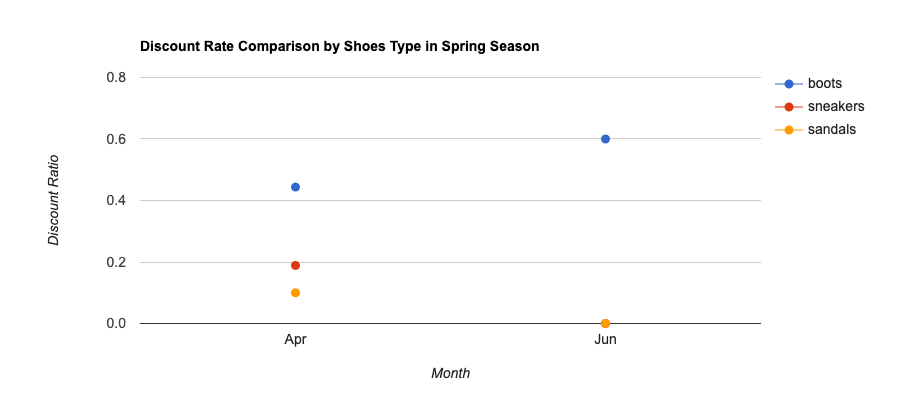

In [14]:
%%chart scatter --fields month2,boots,sneakers,sandals  --data sea2_avg
title: Discount Rate Comparison by Shoes Type in Spring Season
height: 400
width: 900
hAxis:
  title: Month
vAxis:
  title: Discount Ratio

__Notice that we only have boots and sneakers for the chart in spring. That is because both flats and heels have no discount observations during spring. We also do not have observations from May.__

#### For summer, we only have 3 observations for our selected shoes type and we concluded it is not sufficient to support a full analysis. Similar situation happened to fall. We have too few observations to make concrete inferences.  

#### __Thus, graphs for discount ratio in summer and fall are missing.__

## Summary
* > If you are interested in buying boots, February would be perfect timing since there are many discounts and they are good deals--the average discount for boots in February is 46% off.  
* > If you are interested in buying heels, February would also be a good timing! The average discount for heels in February is 35% off.  
* > If you are interested in buying sneakers, February is still a good timing! The average discount for snakers in February is 22% off. However, for sneakers, if you miss this sale season, you can probably wait for the next one! April would be a good time to buy sneakers as well.  
* > If you are interested in buying flats, there is some additional choice-making--flats have a bigger discount in January, which is about 40% off on average; but if you are not happy with the flats types on sale in January (195 discounted instances in total), you can wait a little bit for February, when the discount may not be as big (36% off) but the selection range is bigger (704 discounted instances in total).  


Overall, February is a very good month for restocking your shoes cabinet!


# 3. What to buy
In this part of the query, we focus on the question: "What can we buy in discount seasons?" In other words, we try to find what colors and sizes of boots, heels, sneakers and flats have the greatest discount. Therefore, we 
- plot average discount ratio against sizes for each type of shoes
- plot average discount ratio against 6 colors of each of the four types. 
<br>

Note: We choose the column chart in this part of the analysis because most of the data in our dataset are categorical, such as type, color and size

## 3.1 Average Discount Ratio Against Sizes for Each Type of Shoes

### 3.1.1. Boots
    Boots of size 5 has the largest discount ratio of approximately 43% off the original price.

In [21]:
%%bq query -n size_mean_discount_Boots
SELECT size,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Boots' and size>4
GROUP BY size
ORDER BY size


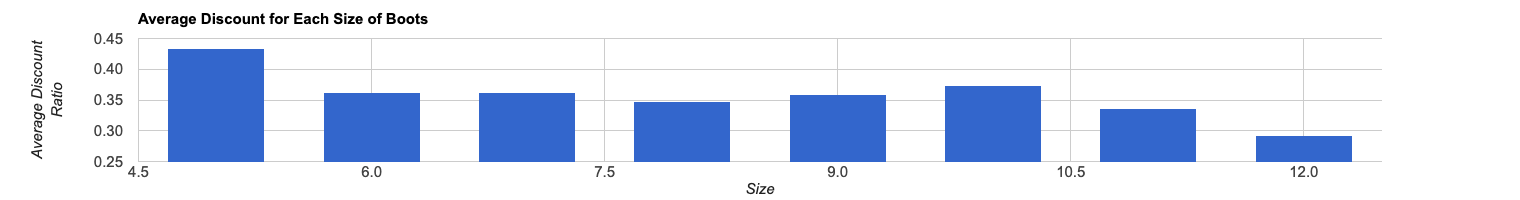

In [22]:
%%chart columns --d size_mean_discount_Boots
title: Average Discount for Each Size of Boots
hAxis:
  title: Size
vAxis:
  title: Average Discount Ratio
legend: none

  

### 3.1.2.Heels
    Heels of size 10 has the largest discount ratio of approximately 28% off the original price.

In [19]:
%%bq query -n size_mean_discount_heels
SELECT size,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Heels' and size > 4
GROUP BY size
ORDER BY size


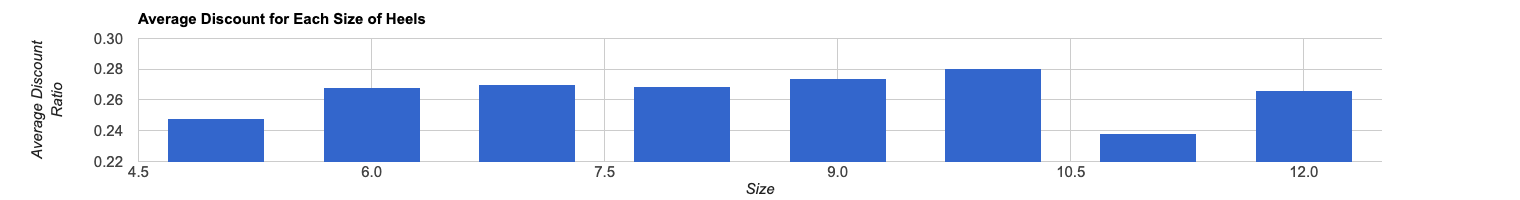

In [20]:
%%chart columns --d size_mean_discount_heels
title: Average Discount for Each Size of Heels
hAxis:
  title: Size
vAxis:
  title: Average Discount Ratio
legend: none

### 3.1.3. Sneakers
    Sneakers of size 5 has the largest discount ratio of approximately 16% off the original price.

In [17]:
%%bq query -n size_mean_discount_sneakers
SELECT size,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Sneakers' and size > 4
GROUP BY size
ORDER BY size

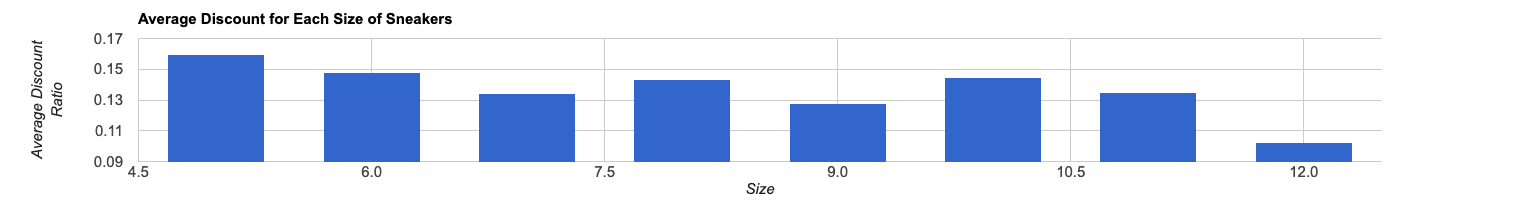

In [18]:
%%chart columns --d size_mean_discount_sneakers
title: Average Discount for Each Size of Sneakers
hAxis:
  title: Size
vAxis:
  title: Average Discount Ratio
legend: none

### 3.1.4 Flats
    Flats of size 9 has the largest discount ratio of approcimately 31% off the original price.

In [15]:
%%bq query -n size_mean_discount_flats
SELECT size,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Flats' and size > 4
GROUP BY size
ORDER BY size

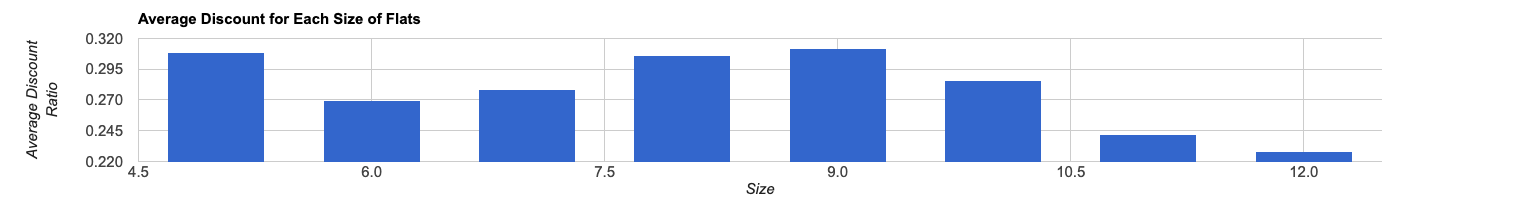

In [16]:
%%chart columns --d size_mean_discount_flats
title: Average Discount for Each Size of Flats
hAxis:
  title: Size
vAxis:
  title: Average Discount Ratio
legend: none

### 3.1.5 Sandals
    Flats of size 7 has the largest discount ratio of approcimately 26% off the original price.

In [1]:
%%bq query -n size_mean_discount_sandals
SELECT size,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Sandals' and size > 4
GROUP BY size
ORDER BY size

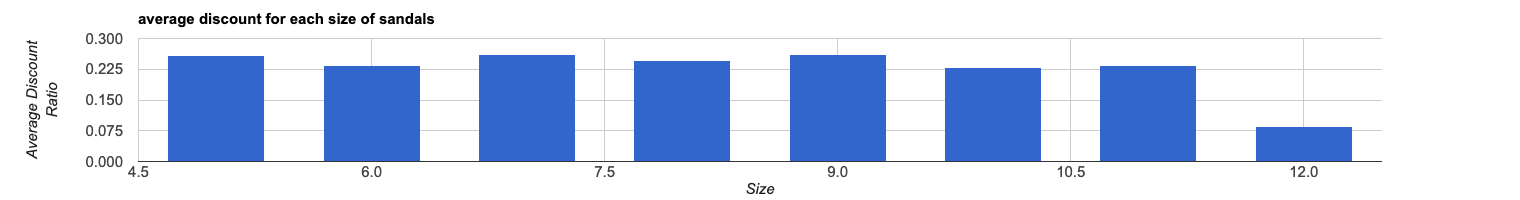

In [2]:
%%chart columns --d size_mean_discount_sandals
title: average discount for each size of sandals
hAxis:
  title: Size
vAxis:
  title: Average Discount Ratio
legend: none

## 3.2. average discount ratio against 6 colors of each of the four types.

### 3.2.1. Boots
    Pewter (Close to silver) boots has the largest discount ratio of approximately 55% off the original price.

In [13]:
%%bq query --n color_mean_discount_Boots
SELECT color,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Boots' and size > 4
GROUP BY color, color_num 
ORDER BY average_discount desc
limit 6

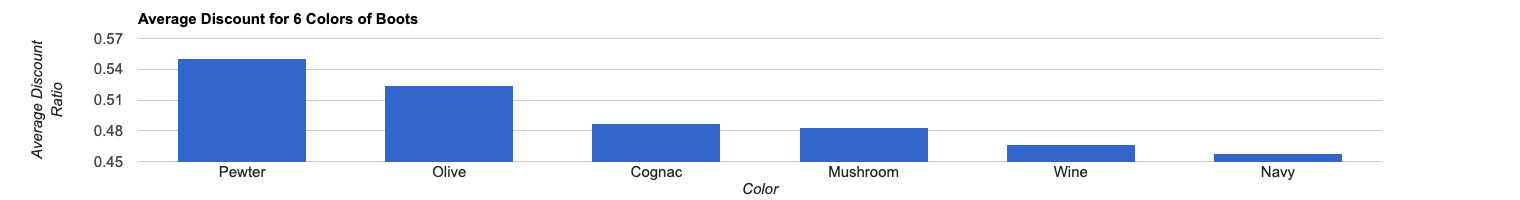

In [14]:
%%chart columns --d color_mean_discount_Boots
title: Average Discount for 6 Colors of Boots
hAxis:
  title: Color
vAxis:
  title: Average Discount Ratio
legend: none

### 3.2.2. Heels
    Wine heels has the largest discount ratio of approximately 37% off the original price.

In [11]:
%%bq query --n color_mean_discount_Heels
SELECT color,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Heels' and size > 4
GROUP BY color, color_num 
ORDER BY average_discount desc
limit 6

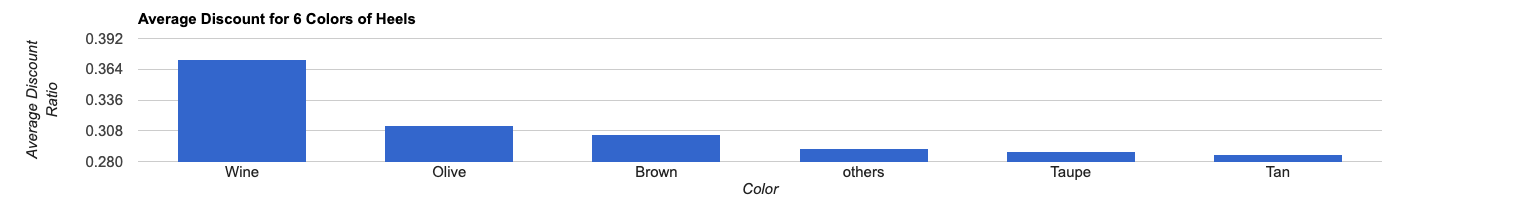

In [12]:
%%chart columns --d color_mean_discount_Heels
title: Average Discount for 6 Colors of Heels
hAxis:
  title: Color
vAxis:
  title: Average Discount Ratio
legend: none

### 3.2.3. Sneakers
    White/Black sneakers has the largest discount ratio of approximately 21% off the original price.

In [9]:
%%bq query --n color_mean_discount_Sneakers
SELECT color,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Sneakers' and size > 4
GROUP BY color, color_num 
ORDER BY average_discount desc
limit 6

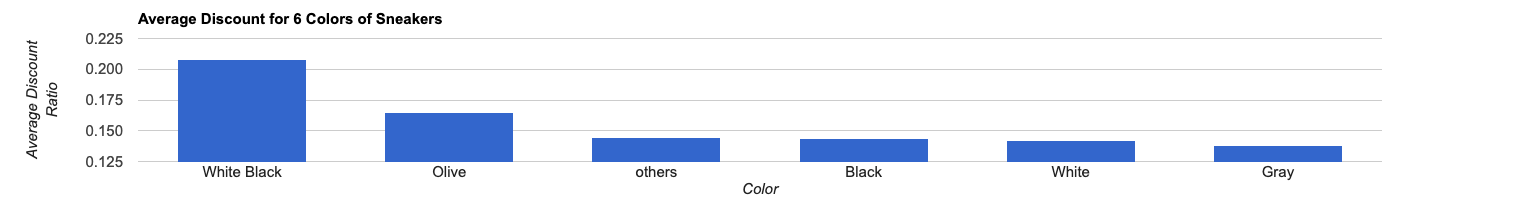

In [10]:
%%chart columns --d color_mean_discount_Sneakers
title: Average Discount for 6 Colors of Sneakers
hAxis:
  title: Color
vAxis:
  title: Average Discount Ratio
legend: none

### 3.2.4. Flats
    Cognac flats has the largest discount ratio of approximately 58% off the original price!

In [7]:
%%bq query --n color_mean_discount_Flats
SELECT color,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Flats' and size > 4
GROUP BY color, color_num 
ORDER BY average_discount desc
limit 6

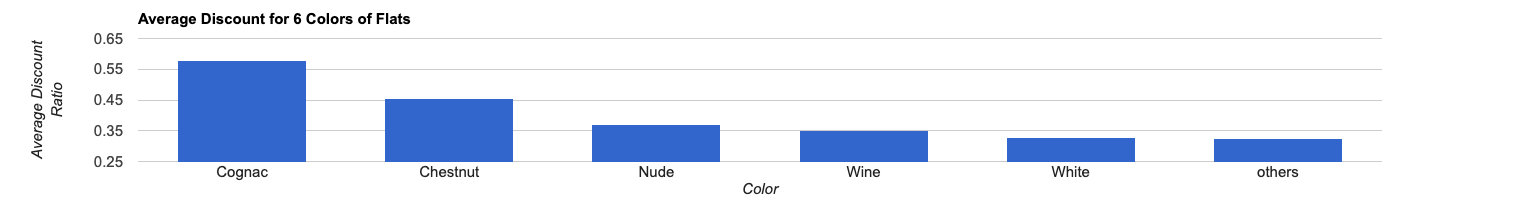

In [8]:
%%chart columns --d color_mean_discount_Flats
title: Average Discount for 6 Colors of Flats
hAxis:
  title: Color
vAxis:
  title: Average Discount Ratio
legend: none

### 3.2.5. Sandals
    Wine sandals has the largest discount ratio of approximately 59% off the original price!

In [5]:
%%bq query --n color_mean_discount_sandals
SELECT color,avg(discount_ratio) as average_discount
FROM `ba770-team2.women_shoes.wsdata2`
WHERE type='Sandals' and size > 4
GROUP BY color, color_num 
ORDER BY average_discount desc
limit 6

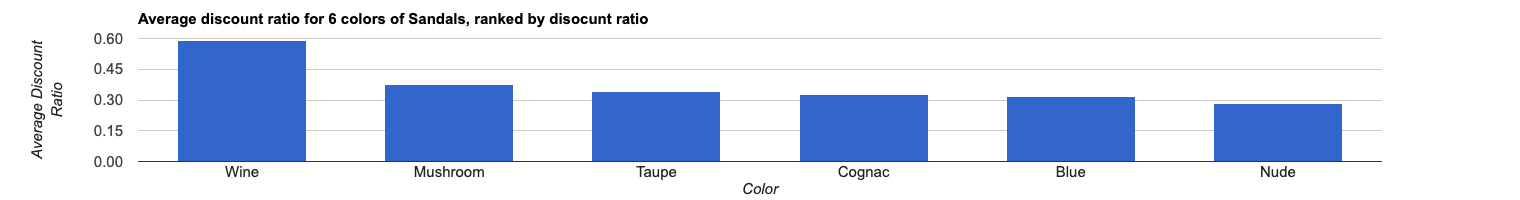

In [4]:
%%chart columns --d color_mean_discount_sandals
title: Average discount ratio for 6 colors of Sandals, ranked by disocunt ratio
hAxis:
  title: Color
vAxis:
  title: Average Discount Ratio
legend: none

# 4. CONCLUSION
note: we use only the first three months since the data quantity is large enough compared to other months to give reliable results. All suggestions intend to provide guidance on purchasing the most economical women’s shoes, seeking a bigger consumer surplus.

## 4.1. Each discount ratios of different types in the first three months

Generally speaking, if one wants to purchase shoes during the first three months of the year, buying sandals in January, buying boots in February, and getting sandals again in March would be a viable strategy to save more money than buying shoes in other categories.

In [9]:
%%bq query -n data

SELECT * except(month) FROM `ba770-team2.Derivatives_from_bquery.12345` 
order by month

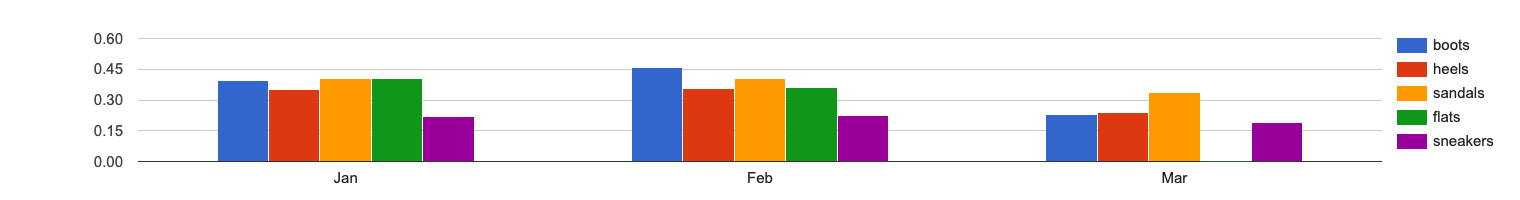

In [10]:
%%chart columns --d data


## 4.2. The sesonal discount ratio of different types

However, when one has no preferences, our best suggestion for her is to buy sandals during the first season since they are 38.2% lower than their original prices, which is the largest reduction compared to the other four types.
  

In [7]:
%%bq query --n data1
SELECT "Season 1" as season1, avg(boots) as Boots , avg(heels) as heels, avg(sandals) as sandals, avg(flats) as flats, avg(sneakers) as sneakers
FROM `ba770-team2.Derivatives_from_bquery.12345` 


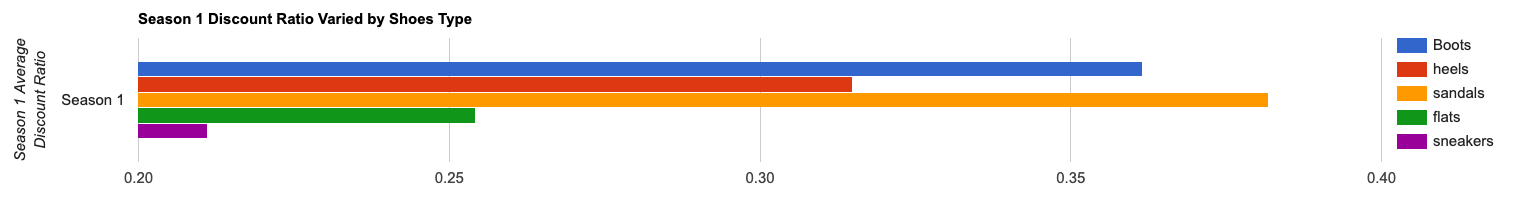

In [8]:
%%chart bars --d data1
title: Season 1 Discount Ratio Varied by Shoes Type
vAxis: 
  title: Season 1 Average Discount Ratio

##  4.3. Colors of different types of shoes that has the most discount ratio
More specifically, colors also play an important role in terms of discount, where Pewter boots is 55% off, White Black sneakers saves 20.8%, wine color Heels is 37.3% off, cognac flats is 57.8% off, and finally wine sandals is 59% off. Therefore, buying these types of shoes with these colors could save even more money.

In [10]:
%%bq query
select max(average_discount) as maxdiscount_Boots, color,month
from (SELECT color, avg(discount_ratio) as average_discount,month
FROM `ba770-team2.women_shoes.wsdata`
WHERE type='Boots' and size > 3
GROUP BY color,month) 
where month = 1 or month = 2 or month = 3
group by color,month
order by maxdiscount_Boots desc  limit 1

maxdiscount_Boots,color,month
0.5576666666666666,Olive,2


In [9]:
%%bq query
select max(average_discount) as maxdiscount_Sneakers, color,month
from (SELECT color, avg(discount_ratio) as average_discount,month
FROM `ba770-team2.women_shoes.wsdata`
WHERE type='Sneakers' and size > 3
GROUP BY color,month) 
where month = 1 or month = 2 or month = 3
group by color,month
order by maxdiscount_Sneakers desc 
 limit 1

maxdiscount_Sneakers,color,month
0.2585,White Black,2


In [8]:
%%bq query
select max(average_discount) as maxdiscount_Heels, color,month
from (SELECT color, avg(discount_ratio) as average_discount,month
FROM `ba770-team2.women_shoes.wsdata`
WHERE type='Heels' and size > 3
GROUP BY color,month) 
where month = 1 or month = 2 or month = 3
group by color,month
order by maxdiscount_Heels desc 
limit 1

maxdiscount_Heels,color,month
0.4018695652173913,Wine,2


In [2]:
%%bq query
select max(average_discount) as maxdiscount_Flats, color,month
from (SELECT color, avg(discount_ratio) as average_discount,month
FROM `ba770-team2.women_shoes.wsdata`
WHERE type='Flats' and size > 3
GROUP BY color,month) 
where month = 1 or month = 2 or month = 3
group by color,month
order by maxdiscount_Flats desc limit 1


maxdiscount_Flats,color,month
0.68,Cognac,2


In [7]:
%%bq query
select max(average_discount) as maxdiscount_Sandals, color,month
from (SELECT color, avg(discount_ratio) as average_discount,month
FROM `ba770-team2.women_shoes.wsdata`
WHERE type='Sandals' and size > 3
GROUP BY color,month) 
where month = 1 or month = 2 or month = 3
group by color,month
order by maxdiscount_Sandals desc limit 1


maxdiscount_Sandals,color,month
0.59,Wine,1
